In [22]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [23]:
func = lambda x: 0.5*np.linalg.norm(A @ x - b)**2
grad = lambda x: A.T @ (A @ x - b)

In [29]:
n = 10
A = np.eye(n)*np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)
L = np.amax(np.linalg.eigh(A.T @ A)[0])

In [30]:
def ternary_search_vec(xk, zk, func):
    a = 0.
    b = 1. 
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(xk*c+zk*(1-c)) >= func(xk * d + zk * (1 - d)):
            a = c
        else:
            b = d 
    return (b + a) / 2

In [31]:
def Triangles_1_5(x0, L, it, func, grad):    
    xk = x0
    zk = x0
    yk = x0
    ak = 1 / L
    a_bigk = ak
    res = [func(xk)]
    for i in range(it):
        ak = 1 / L * 0.5 + (1 / L**2 * 0.25 + ak**2)**0.5
        alpha = ternary_search(xk, zk, func)
        yk = xk * alpha + zk * (1 - alpha)
        xk -= ak * grad(yk)
        zk = xk * alpha + zk * (1 - alpha)
        a_bigk += ak
        res.append(func(xk))
    return xk, res    

In [32]:
x, res = Triangles_1_5(x0, L, 2000, func, grad)

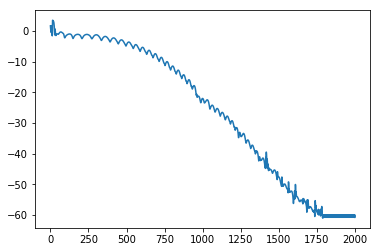

In [33]:
plt.plot(np.log(res))
plt.show()